# Intro to Astropy

## What is `astropy`?


`astropy` is a Python package that offers tools and functions that are useful for various tasks in astronomy and astrophysics, including and not limited to planning an observation, reducing the data from the observation, analysing it, and other numerical and modeling tasks. You don't need to know every line of code in this package, but it's helpful to know what tools exist here so you don't have to reinvent the wheel!

All the documentation is here: https://docs.astropy.org/en/stable/index.html, including tutorials and user guides for particular subpackages.

Some commonly used subpackages are:

* [`units`](https://docs.astropy.org/en/stable/units/index.html): Handles defining, converting between, and performing arithmetic with physical quantities
* [`constants`](https://docs.astropy.org/en/stable/constants/index.html): Contains a number of physical constants useful in Astronomy
* [`table`](https://docs.astropy.org/en/stable/table/index.html): Provides a flexible and easy-to-use set of tools for working with tabular data using an interface based on numpy.
* [`io.fits`](https://docs.astropy.org/en/stable/io/fits/index.html): Reading and writing FITS files, a common astronomical data format.
* [`time`](https://docs.astropy.org/en/stable/time/index.html): Handy conversions between different time formats, e.g. MJD vs. standard calendar.
* [`coordinates`](https://docs.astropy.org/en/stable/coordinates/index.html): Contains classes for celestial/spatial coordinates and their velocity components, and tools to uniformly convert between common coordinate systems.


## Importing `astropy`


You could import all of astropy, which is a huge, huge library, but it is not recommended! 

Ideally you just import the subpackage or class/function within the subpackage that you need, using the below syntax:
```
from astropy import subpackage
import astropy.subpackage as s
from astropy.subpackage import class
```

## Quantities and the `units` and `constants` subpackages

`astropy` contains a special data structure called a [`Quantity`](https://docs.astropy.org/en/stable/units/quantity.html), which represents a number associated with some unit, like kilograms or seconds. This makes it much easier to do arithmetic with different units, keep track of dimensional analysis, and convert between different units.

The [`units`](https://docs.astropy.org/en/stable/units/index.html) subpackage defines all the possible units you can use, with a handy table to reference [here](https://docs.astropy.org/en/stable/units/ref_api.html#module-astropy.units.si). 

The [`constants`](https://docs.astropy.org/en/stable/constants/index.html) subpackage stores physical constants commonly used in physics/astronomy with their associated units. And a handy table of those constants is [here](https://docs.astropy.org/en/stable/constants/index.html#module-astropy.constants). All constants are also a `Quantity` object, and can be used in math the same way.

In [ ]:
# import the subpackages to save quantities as objects with units and have pre-defined constants
import astropy.units as u
import astropy.constants as c

### Try out using `astropy.units`! 

To create a quantity, multiply a float with a unit. Then, you can access just the value or just unit of that quantity by using attributes:

In [ ]:
d = 15.1 * u.meter 
print("Distance: ",d)
print("Distance value: ",d.value)
print("Distance unit: ",d.unit)

t = 32.0 * u.second
print("\nTime: ",t)
print("Time value: ",t.value)
print("Time unit: ",t.unit)

You can combine quantities and `astropy` will keep track of the units for you! You can also manually convert between different units using the `.to()` method, as long as the units have the same physical dimensions.

In [ ]:
# Calculate a velocity
v = d/t
display(v)

# Convert m/s to AU/yr
display(v.to(u.AU/u.yr))

### Try out using `astropy.constants`!

In [ ]:
# what does a constant object entail?
G = c.G 
print(G)

### DIY: Calculate the gravitational force between a 3 solar mass star and its 10 Jupiter mass planet 2 au away. 

Remember, the documentation pages are there for you as a resource. It's not cheating to have those pages open all the time!

In [ ]:
# Masses with units of M_sun and M_jub

# Distance with unit of au

# Calculate gravitational force using masses distance and the gravitational constant G


## Data Formats

### Tables

[`astropy.table`](https://docs.astropy.org/en/stable/table/index.html#using-astropy-table) provides a flexible and easy-to-use set of tools for working with tabular data using an interface based on `numpy`. In addition to basic table creation, access, and modification operations, key features include:

* Support columns of astropy `time`, `coordinates`, and `quantities`.

* Support multidimensional and structured array columns.

* Maintain the units, description, and format of columns.

* Provide flexible metadata structures for the table and individual columns.

* Perform Table Operations like database joins, concatenation, and binning.

* Maintain a table index for fast retrieval of table items or ranges.

* Support a general mixin protocol for flexible data containers in tables.

* Read and write to files via the Unified File Read/Write Interface.

* Convert to and from `pandas.DataFrame`.

In [ ]:
from astropy.table import Table
import astropy.units as u
import numpy as np

a = np.array([1, 4, 5], dtype=np.int32)
b = [2.0, 5.0, 8.5]
c = ['x', 'y', 'z']
d = [10, 20, 30] * u.m / u.s

t = Table([a, b, c, d],
           names=('a', 'b', 'c', 'd'),
           meta={'name': 'first table'})

display(t)

### FITS

[`astropy.io`](https://docs.astropy.org/en/stable/io/overview.html) is a unified interface for reading and writing data in different formats. The [`astropy.io.fits`](https://docs.astropy.org/en/stable/io/fits/index.html) subpackage is specifically for handling FITS files.

In [ ]:
# import i/o subpackage for reading FITS files
from astropy.io import fits

# Get path for data that came with astropy installation
fits_img_fn = fits.util.get_testdata_filepath('test0.fits')

#### What even is a FITS file?
FITS files are a commonly used data format to associate numerical data with additional relevant information. 

An HDU (Header Data Unit) is the highest level component of the FITS file structure, consisting of a header and (typically) a data array or table. The header is a dictionary-like data structure that contains information about the data array/table.

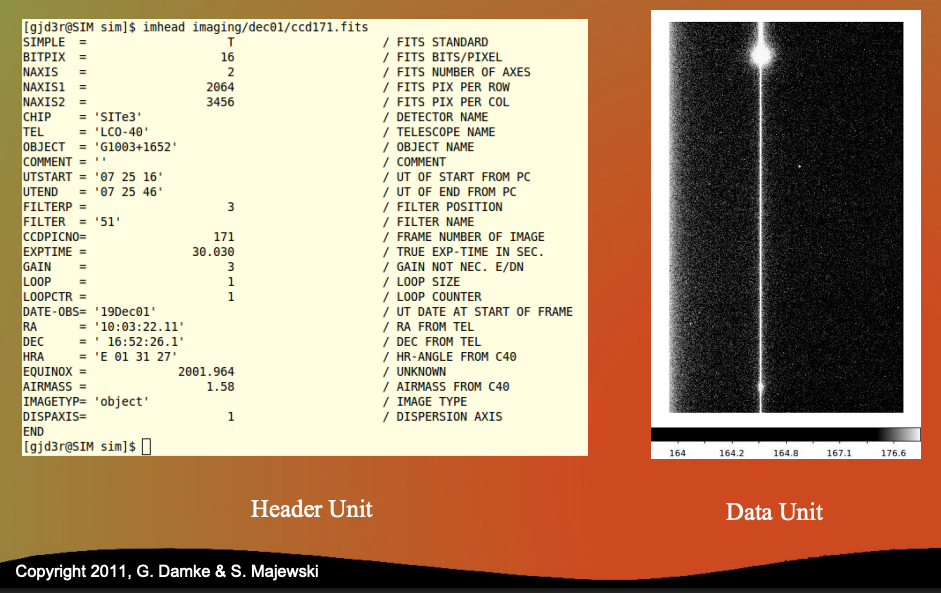

A FITS file contains a list of HDUs, so when you open one with `astropy.io.fits`, you get an [`HDUList`](https://docs.astropy.org/en/stable/io/fits/api/hdulists.html#astropy.io.fits.HDUList) object.

In [ ]:
# open HDUList object for file and see what it contains
hdul = fits.open(fits_img_fn)

# The HDUList has a useful method HDUList.info(), 
# which summarizes the content of the opened FITS file:
hdul.info()

In [ ]:
# what does the data look like? how do you "get data" from the file?
display(hdul[0].header)

In [ ]:
display(hdul[1].data)

In [ ]:
# Remember to close the file when you're done!
hdul.close()

# What happens if you try to look at the data now that we've closed the file?

## Planning Observations

Planning observations takes into account the targets, dates and times, location of observing, moon cycle, etc.

### Example: Looking at Fomalhaut

Here's a simple start-- You have to plan an observation of Fomalhaut from Subaru.

#### Step 1:  
The first step is to generate the coordinates of the star and the observing site. We'll use the `SkyCoord`, `EarthLocation`, and `AltAz` classes from [`astropy.coordinates`](https://docs.astropy.org/en/stable/coordinates/index.html) and `Observer` class from [`astroplan`](https://astroplan.readthedocs.io/en/latest/getting_started.html#general-guidelines). (Hint: the guideline pages linked in this section should give you the functions you need.)


In [ ]:
# Uncomment the below line if you need to install astroplan!
# !pip install astroplan

In [ ]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astroplan import Observer

# Get the coordinates of Fomalhaut
fomalhaut_coords = 

# get observatory info and store its coordinates as an EarthLocation
subaru_observer_object = 
subaru_loc = 

print(f'Sky Coords of Fomalhaut: {fomalhaut_coords} and Geocentric Coords of Subaru: {subaru_loc}')

#### Step 2:

Visualise and plot its visibility on a date of your choice

In [ ]:
# determine position for a give date: Let's say Jul 31 2024
from astropy.time import Time
# coz you'll need this
import numpy as np

# define midnight 
midnight = Time('2024-07-31 00:00:00')
# Define grid of times to calculate position over:
delta_midnight = np.linspace(-12, 12, 1000)*u.hour 
times = midnight + delta_midnight

# Set up AltAz reference frame for these times and location
frame= AltAz(obstime=times, location=subaru_loc)

# Now we transform the Fomalhaut object to the Altitute/Azimuth coordinate system
fomalhaut_altaz = fomalhaut_coords.transform_to(frame)

In [ ]:
# now... can we see this source at night? this would depend on where the sun is
from astropy.coordinates import get_sun


In [ ]:
# for plotting
import matplotlib.pyplot as plt

# astropy's visualisation tool
from astropy.visualization import astropy_mpl_style


plt.style.use(astropy_mpl_style)

plt.figure()

# Plot the sun altitude
sun_altaz = 

plt.plot(   )

# Plot Fomalhaut's alt/az - use a colour map to represent azimuth. Scatter plot is advises


# Now plot the range when the sun is below the horizon, and at least 18 degrees below 
# the horizon - this shows the range of twilight (-0 to -18 deg) and night (< -18 deg)
plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 sun_altaz.alt < 0*u.deg, color='0.7', zorder=0)
plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 sun_altaz.alt < -18*u.deg, color='0.4', zorder=0)

#now for the details
plt.colorbar().set_label('Azimuth [deg]')
plt.legend(loc='upper left')
plt.xlim(-12, 12)
plt.xticks(np.arange(-12, 14, 2))
plt.ylim(20, 90)
plt.xlabel('Hours from UT Midnight')
plt.ylabel('Altitude [deg]')
plt.show()


## Additional Resources

* [Intro to Astropy Lecture by Phil Uttley](https://philuttley.github.io/prog4aa_lesson2/09-astropyintro/index.html)